In [7]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image as im
import random

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from xgboost import XGBClassifier

### Uplodaing the data

In [8]:
train_dir = r'C:\Users\meirk\Desktop\train\train/'

train_images_filepath = [train_dir + last_file_name for last_file_name in os.listdir(train_dir)]
print("Done")
train_dogs_filepaths = [train_dir + dog_file_name for dog_file_name in os.listdir(train_dir) if 'dog' in dog_file_name]
train_cats_filepaths = [train_dir + cat_file_name for cat_file_name in os.listdir(train_dir) if 'cat' in cat_file_name]
print("Done")

Done
Done


In [29]:
def read_image(file_path):
    #grayscaling whan uploasding using cv2
    img = cv2.imread(file_path,0)
    #resizing the image to 64,64 format
    return cv2.resize(img, (64, 64))

#### Note: read_image return the image after resizing it to 64X64 in ordr to make sure that all images are int he same foramt.

In [10]:
def prep_data(images):
    m = len(images)
    n_x = 4096
    X = np.ndarray((m, n_x), dtype=np.uint8)
    y = np.zeros((m, 1))

    for i, image_file in enumerate(images):
        image = read_image(image_file)
       # image = plt.imread(image_file, 0)
        X[i, :] = np.squeeze(image.reshape((n_x, 1)))
        if '/dog' in image_file:
            y[i, 0] = 1
        elif '/cat' in image_file:
             y[i, 0] = 0
        
    return X, y

In [11]:
data,target = prep_data(train_images_filepath)
#X_dogs, y_dogs = prep_data(train_dogs_filepaths)
#x_cats, y_cats = prep_data(train_cats_filepaths)

In [12]:
data_df = pd.DataFrame(data)
data_df

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,170,176,183,188,192,196,200,202,205,208,...,10,9,3,3,3,2,2,2,2,2
1,43,42,36,29,41,43,72,38,37,37,...,77,64,38,39,56,58,53,72,68,29
2,45,46,46,57,56,51,58,50,51,46,...,76,79,90,142,162,150,139,151,171,158
3,220,222,231,226,234,226,225,227,229,226,...,248,240,234,228,212,205,205,220,214,213
4,114,122,86,90,138,148,133,192,210,230,...,100,98,105,94,91,88,98,106,94,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,141,142,145,147,148,148,150,151,152,153,...,164,163,164,164,165,167,167,168,168,169
24996,90,86,84,98,67,94,86,64,75,100,...,63,71,80,90,90,90,78,87,114,68
24997,38,48,46,38,49,54,44,64,45,34,...,51,157,141,114,137,101,99,212,136,170
24998,254,246,228,195,144,96,66,71,89,64,...,96,101,112,87,71,96,95,121,116,118


## Data visualization

In [13]:
data_df.isna().sum()

0       0
1       0
2       0
3       0
4       0
       ..
4091    0
4092    0
4093    0
4094    0
4095    0
Length: 4096, dtype: int64

<module 'seaborn' from 'C:\\Users\\meirk\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

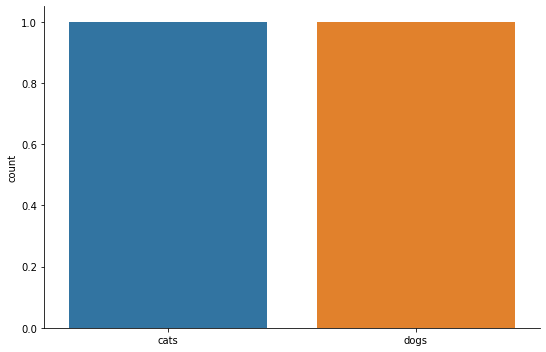

In [14]:
labels = pd.DataFrame(data=target, columns=['label'])
counts = labels.value_counts()
sns.catplot(data=counts,kind='count',height=5,aspect=1.5,x=['cats','dogs'])
sns

Lets look on some random images to make sure the data did uploaded in gratscale

In [49]:
plt.figure(figsize=(16,16))

#for i in range(0,6):
 #   index = random.randint(0,24999)
   # plt.imshow(data[index].reshape(64,64),interpolation='nearest')
  #  fig = plt.subplot(4,4,i+1)
   # fig.axis('off')
    #fig.imshow(data[index].reshape(64,64)) 
fig.imshow(data[5604].reshape(64,64))

<Figure size 1152x1152 with 0 Axes>

## PCA

In [16]:
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data)

In [17]:
pd.DataFrame(data=data_pca)

,0,1,2,3,4,5,6,7,8,9,...,943,944,945,946,947,948,949,950,951,952
0,1494.398565,-2064.052909,-3438.124778,-209.498912,385.394239,787.568382,48.088099,290.191300,-149.714988,669.851593,...,7.241282,-18.132653,-0.178145,14.487607,13.044340,15.625563,-10.912404,21.372897,-1.429136,36.003874
1,-3056.815094,-670.732309,-692.247956,335.365544,-717.148951,64.180216,-249.195320,-555.235009,-116.657106,-84.141944,...,-11.762232,-6.398184,-7.872594,15.979168,7.892248,1.568008,14.914195,33.886849,-13.230934,-10.678455
2,-717.233942,599.217934,-659.959922,880.784420,768.181476,1281.195325,255.334367,-1191.906584,1029.212476,-369.261138,...,10.287102,17.197809,-8.542403,-4.044418,22.474553,-22.936412,-3.240593,-23.767033,-2.875421,-1.786274
3,3561.198732,-317.895851,572.022067,130.804699,1075.107371,-1163.641087,-1111.275699,29.851441,705.367544,462.921307,...,-0.608983,-0.843583,-1.551482,-10.387023,20.778187,-55.371935,1.444397,21.273852,12.347854,16.146456
4,-1711.394202,1465.149633,-1185.262254,-611.486769,-1545.919173,-685.668861,-761.961886,-55.374726,1161.584464,1090.661445,...,-5.698684,8.430965,3.156913,40.209213,0.961732,-1.096062,8.792812,-16.577996,-12.208254,57.056132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,157.060119,-1911.426074,-319.934730,3417.033278,-311.277523,-1020.662460,-680.361128,523.874401,-487.142348,560.200084,...,-5.416915,-9.403080,12.079648,-24.885192,5.648823,-1.655325,5.122018,14.712519,9.128276,-28.392771
24996,-2670.259906,-1237.789430,256.121826,-760.538963,-60.699444,151.620978,-169.743621,-61.298752,202.267491,-3.832807,...,13.757573,-25.905433,-2.711928,9.866674,-9.558854,3.647232,26.917975,40.797507,27.867381,-9.998921
24997,-731.219766,-919.690093,624.937558,-203.359147,-392.545943,-542.857447,692.309543,-389.568519,-298.656479,-299.900918,...,16.643124,49.120573,-7.030579,61.301138,-19.835038,27.588358,14.259113,46.981098,-39.245215,-69.018931
24998,518.385862,-52.263735,-915.716693,900.935531,852.947635,202.398658,341.143308,-213.891410,-39.616435,7.327754,...,-61.471486,1.557882,38.471277,32.755796,6.404683,-28.313335,17.385965,-1.325022,-17.422375,-1.315757


## Scaling

In [43]:
data_pca_s = data_pca/255
pd.DataFrame(data=data_pca_s)

,0,1,2,3,4,5,6,7,8,9,...,943,944,945,946,947,948,949,950,951,952
0,5.860387,-8.094325,-13.482842,-0.821564,1.511350,3.088503,0.188581,1.138005,-0.587118,2.626869,...,0.028397,-0.071108,-0.000699,0.056814,0.051154,0.061277,-0.042794,0.083815,-0.005604,0.141192
1,-11.987510,-2.630323,-2.714698,1.315159,-2.812349,0.251687,-0.977237,-2.177392,-0.457479,-0.329968,...,-0.046126,-0.025091,-0.030873,0.062663,0.030950,0.006149,0.058487,0.132890,-0.051886,-0.041876
2,-2.812682,2.349874,-2.588078,3.454057,3.012476,5.024295,1.001311,-4.674143,4.036127,-1.448083,...,0.040342,0.067442,-0.033500,-0.015860,0.088136,-0.089947,-0.012708,-0.093204,-0.011276,-0.007005
3,13.965485,-1.246650,2.243224,0.512960,4.216107,-4.563298,-4.357944,0.117064,2.766147,1.815378,...,-0.002388,-0.003308,-0.006084,-0.040733,0.081483,-0.217145,0.005664,0.083427,0.048423,0.063319
4,-6.711350,5.745685,-4.648087,-2.397987,-6.062428,-2.688897,-2.988086,-0.217156,4.555233,4.277104,...,-0.022348,0.033063,0.012380,0.157683,0.003771,-0.004298,0.034482,-0.065012,-0.047876,0.223750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.615922,-7.495789,-1.254646,13.400131,-1.220696,-4.002598,-2.668083,2.054409,-1.910362,2.196863,...,-0.021243,-0.036875,0.047371,-0.097589,0.022152,-0.006491,0.020086,0.057696,0.035797,-0.111344
24996,-10.471607,-4.854076,1.004399,-2.982506,-0.238037,0.594592,-0.665661,-0.240387,0.793206,-0.015031,...,0.053951,-0.101590,-0.010635,0.038693,-0.037486,0.014303,0.105561,0.159990,0.109284,-0.039211
24997,-2.867528,-3.606628,2.450736,-0.797487,-1.539396,-2.128853,2.714939,-1.527720,-1.171202,-1.176082,...,0.065267,0.192630,-0.027571,0.240397,-0.077784,0.108190,0.055918,0.184240,-0.153903,-0.270662
24998,2.032886,-0.204956,-3.591046,3.533081,3.344893,0.793720,1.337817,-0.838790,-0.155359,0.028736,...,-0.241065,0.006109,0.150868,0.128454,0.025116,-0.111033,0.068180,-0.005196,-0.068323,-0.005160


In [18]:
scaler = StandardScaler()
data_pca_scaled = scaler.fit_transform(data_pca)

In [19]:
pd.DataFrame(data=data_pca_scaled)

,0,1,2,3,4,5,6,7,8,9,...,943,944,945,946,947,948,949,950,951,952
0,0.813545,-1.507585,-3.039264,-0.207021,0.529688,1.142996,0.076174,0.497675,-0.269206,1.347831,...,0.269182,-0.674847,-0.006635,0.539931,0.486313,0.582795,-0.407284,0.798305,-0.053414,1.346591
1,-1.664119,-0.489903,-0.611939,0.331399,-0.985654,0.093145,-0.394736,-0.952223,-0.209764,-0.169305,...,-0.437240,-0.238123,-0.293199,0.595519,0.294235,0.058483,0.556643,1.265717,-0.494506,-0.399388
2,-0.390460,0.437669,-0.583397,0.870368,1.055793,1.859395,0.404460,-2.044108,1.850652,-0.743003,...,0.382405,0.640054,-0.318145,-0.150729,0.837886,-0.855471,-0.120949,-0.887729,-0.107469,-0.066809
3,1.938704,-0.232191,0.505661,0.129258,1.477634,-1.688789,-1.760307,0.051195,1.268338,0.931460,...,-0.022638,-0.031396,-0.057782,-0.387108,0.774643,-2.065236,0.053909,0.794606,0.461501,0.603898
4,-0.931677,1.070146,-1.047759,-0.604255,-2.124720,-0.995109,-1.206980,-0.094967,2.088673,2.194557,...,-0.211838,0.313777,0.117573,1.498536,0.035855,-0.040880,0.328175,-0.619209,-0.456284,2.133972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.085503,-1.396107,-0.282819,3.376621,-0.427822,-1.481285,-1.077721,0.898440,-0.875942,1.127198,...,-0.201364,-0.349956,0.449883,-0.927433,0.210597,-0.061740,0.191169,0.549531,0.341169,-1.061926
24996,-1.453680,-0.904082,0.226409,-0.751544,-0.083426,0.220047,-0.268881,-0.105127,0.363702,-0.007712,...,0.511413,-0.964128,-0.101000,0.367716,-0.356369,0.136033,1.004661,1.523839,1.041544,-0.373972
24997,-0.398073,-0.671742,0.552438,-0.200954,-0.539517,-0.787848,1.096647,-0.668106,-0.537021,-0.603441,...,0.618679,1.828130,-0.261840,2.284600,-0.739481,1.028977,0.532194,1.754804,-1.466791,-2.581396
24998,0.282207,-0.038173,-0.809483,0.890280,1.172296,0.293741,0.540385,-0.366822,-0.071235,0.014744,...,-2.285094,0.057980,1.432787,1.220758,0.238777,-1.056017,0.648897,-0.049491,-0.651162,-0.049211


953 dimentions instead of 4095.

In [20]:
x_train_pca_, x_test_pca_, y_train_pca_, y_test_pca_ = train_test_split(data_pca_scaled, target, test_size=0.3, random_state=42)

In [21]:
log_reg = LogisticRegression()
log_reg.fit(x_train_pca_,y_train_pca_.ravel())
log_pred = log_reg.predict(x_test_pca_)

In [22]:
print(metrics.accuracy_score(y_true=y_test_pca_,y_pred=log_pred))

0.5408


In [23]:
#params = {'n_estimators':range(1,100,3),'max_depth':range(1,30,5),'learning_rate':[0.3,0.5,0.8],
 #        'booster':['gbtree','gblinear','dart']}
#grid_xgb = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False,eval_metric='mlogloss'),param_grid=params,cv=5,return_train_score=False)
#grid_xgb.fit(x_train_pca_,y_train_pca_.ravel())
#print(grid_xgb.best_estimators_, grid_xgb.best_score_)

In [44]:
xgb_clf = XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')
xgb_clf.fit(x_train_pca_,y_train_pca_ )
xgb_pred = xgb_clf.predict(x_test_pca_)

In [45]:
print(metrics.accuracy_score(y_true=y_test_pca_,y_pred=xgb_pred))

0.6109333333333333
